# Getting Started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data and dataset modification

In [2]:
DATA_FOLDER = "../../data/"

CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
PLOT_SUMM_DATASET = DATA_FOLDER+"plot_summaries.txt"
TVTROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"

character_metadata = pd.read_csv(CHARACTER_DATASET, sep='\t')
column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names
movies_column_names = ['Wikipedia_Movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date','Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']
movies = pd.read_csv(MOVIE_DATASET, sep='\t', header=None,names=movies_column_names, decimal='.' )
movies.head()


,Wikipedia_Movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


We want to look at the character ethnicity representation depending on the country. Therefore, we can merge the character dataset with the column from the movie dataset containing the country of each film.  

In [3]:
character_countries = pd.merge(character_metadata,movies[['Wikipedia_Movie_ID', 'Movie_countries']], on = 'Wikipedia_Movie_ID')
character_countries.head()

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_countries
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/09c7w0"": ""United States of America""}"
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"{""/m/09c7w0"": ""United States of America""}"
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,"{""/m/09c7w0"": ""United States of America""}"
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,"{""/m/09c7w0"": ""United States of America""}"
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,"{""/m/09c7w0"": ""United States of America""}"


In [5]:
# Convert `Movie_Release_Date` to datetime format if needed and then extract the release year
# we used format = 'mixed' to include both day-month-year and month-day-year shape
character_countries['Movie_Release_Date'] = pd.to_datetime(character_countries['Movie_Release_Date'], format = 'mixed', errors='coerce')
character_countries['Movie_Release_Year'] = character_countries['Movie_Release_Date'].dt.year

In [7]:
character_countries.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_countries,Movie_Release_Year
146864,384045,/m/021zgd,2000-01-01,NaN,1964-01-04,M,NaN,NaN,Hristo Shopov,35.0,/m/09l2qtm,NaN,/m/02xnx3,"{""/m/09c7w0"": ""United States of America"", ""/m/...",2000.0
193714,15607591,/m/0b22lv1,2002-01-01,NaN,1965-11-19,M,NaN,NaN,David Stuart,36.0,/m/040n_zl,NaN,/m/03cc68z,"{""/m/09c7w0"": ""United States of America""}",2002.0
396996,20808370,/m/058rhb4,1956-11-01,Brewster,1919-06-13,M,NaN,NaN,Richard Collier,37.0,/m/0hnzgvd,/m/0hnzgvj,/m/0h5rd7z,"{""/m/09c7w0"": ""United States of America""}",1956.0
379774,29634937,/m/0fpgvss,2010-12-03,NaN,1973-02-20,M,NaN,NaN,Priyanshu Chatterjee,37.0,/m/0gvyf6s,NaN,/m/02r8nrf,"{""/m/0162b"": ""Bangladesh"", ""/m/03rk0"": ""India""}",2010.0
6263,106262,/m/0qlz9,2000-12-13,Nick Marshall,1992-01-19,M,1.74,/m/041rx,Logan Lerman,8.0,/m/0gy20mj,/m/05spy73,/m/04f1s6,"{""/m/09c7w0"": ""United States of America""}",2000.0


First we need to remove every row where the actor ethnicty has a Nan value and the country is not US.

function LOUIS

In [8]:
def freebase2label(freebase_id, mapping_dataframe):
    label = mapping_dataframe[mapping_dataframe['freebase_id'] == freebase_id]['label']
    if len(label) > 0:
        return label.values[0]
    else:
        return 'None'
    
file_path = '../../data/fb_wiki_mapping.tsv'
freebase_mapping_df = pd.read_csv(file_path, sep='\t')

## Actor ethnicity in the US vs Rest of the world

We want to analyze the impact of 9/11 on the actor ethnicty within each film. In this purpose we will analyze the actor ethnicity changement befrore and after 9/11. Moreover, we expect for 9/11 to have a higher impact in the US compared to the rest of the world. Therefore, we will compare the data on those levels.

In [ ]:
#First we drop Nan in the actor ethnicity column
character = character_countries.dropna(subset=['Actor_Ethnicity'])

#Separation into 2 datasets, one with only movies form the US and the other that contaisn all the other movies
character_ROW = character.loc[~character['Movie_countries'].str.contains("United States of America")]
character_US = character.loc[character['Movie_countries'].str.contains("United States of America")]

#reset the index after Nan removal 
character_ROW = character_ROW.reset_index(drop = True)
character_US = character_US.reset_index(drop = True)

In [10]:
character['Movie_countries']

0         {"/m/09c7w0": "United States of America"}
1         {"/m/09c7w0": "United States of America"}
4         {"/m/09c7w0": "United States of America"}
10        {"/m/09c7w0": "United States of America"}
26        {"/m/09c7w0": "United States of America"}
                            ...                    
450626                        {"/m/03rjj": "Italy"}
450630    {"/m/09c7w0": "United States of America"}
450642                      {"/m/0d060g": "Canada"}
450643                      {"/m/0d060g": "Canada"}
450665               {"/m/07ssc": "United Kingdom"}
Name: Movie_countries, Length: 106058, dtype: object

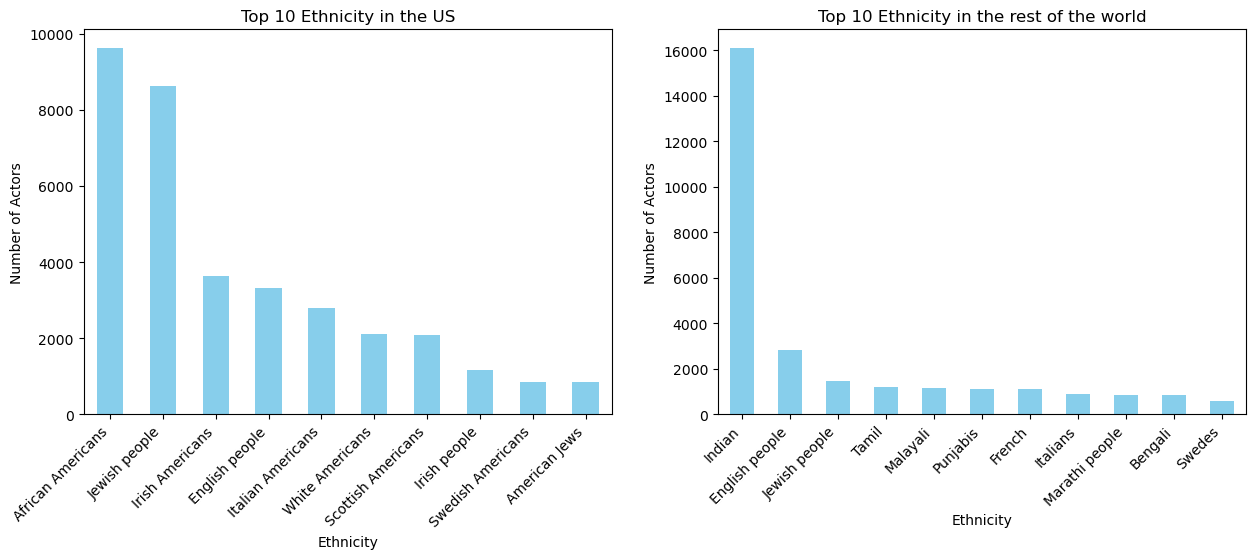

In [ ]:
# Count the occurrences of each ethnicity
ethnicity_top10_ROW = character_ROW['Actor_Ethnicity'].value_counts().nlargest(12)
ethnicity_top10_US = character_US['Actor_Ethnicity'].value_counts().nlargest(12)

ethnicity_new_US = []
ethnicity_new_ROW = []
for i in range(0,len(ethnicity_top10_ROW)):
    ethnicity_new_ROW.append(freebase2label(ethnicity_top10_ROW.index[i],freebase_mapping_df))
    ethnicity_new_US.append(freebase2label(ethnicity_top10_US.index[i],freebase_mapping_df))

ethnicity_top10_ROW.index = ethnicity_new_ROW
ethnicity_top10_US.index = ethnicity_new_US


ethnicity_top10_ROW = ethnicity_top10_ROW.drop(index = 'None')
ethnicity_top10_US = ethnicity_top10_US.drop(index = 'None')


# Plot the distribution of each ethnicity
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ethnicity_top10_US.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the US")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ethnicity_top10_ROW.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the rest of the world")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')
# plt.subplots_adjust(wspace=0.5)
plt.show()


We observe the top 10 ethnicty in the rest of the world differ from the top 10 ethnicty within the US. The African Americains is the most represented ethnicity in the US whereas in the rest of the world this is the indian. 

### The impact of 9/11

We will now deep into a reduce period of time, between 1993 and 2010 and observe the difference between ethnicities representation in the US compared to the rest of the world. 

In [67]:
#For the movies in the US we construct a dataframe with the actor ethnicity before and the actor ethnicity after 9/11
#  Filter data for movies released between 1990 and 2001
data_1993_2001_US = character_US[(character_US['Movie_Release_Year'] >= 1993) & 
                                    (character_US['Movie_Release_Year'] <= 2001)]
data_2002_2010_US = character_US[(character_US['Movie_Release_Year'] >= 2002) & 
                                    (character_US['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
top_ethnicities_US = character_US['Actor_Ethnicity'].value_counts().nlargest(12).index

# Filter for only these top ethnicities in each subset
data_1993_2001_top_US = data_1993_2001_US[data_1993_2001_US['Actor_Ethnicity'].isin(top_ethnicities_US)]
data_2002_2010_top_US = data_2002_2010_US[data_2002_2010_US['Actor_Ethnicity'].isin(top_ethnicities_US)]

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1993_2001_US = data_1993_2001_top_US['Actor_Ethnicity'].value_counts(normalize=True)
ethnicity_counts_2002_2010_US = data_2002_2010_top_US['Actor_Ethnicity'].value_counts(normalize=True)

ethnicity_new_1993_US = []
ethnicity_new_2001_US = []
for i in range(0,len(ethnicity_counts_1993_2001_US)):
    ethnicity_new_1993_US.append(freebase2label(ethnicity_counts_1993_2001_US.index[i],freebase_mapping_df))
    ethnicity_new_2001_US.append(freebase2label(ethnicity_counts_2002_2010_US.index[i],freebase_mapping_df))

ethnicity_counts_1993_2001_US.index = ethnicity_new_1993_US
ethnicity_counts_2002_2010_US.index = ethnicity_new_2001_US

ethnicity_counts_1993_2001_US = ethnicity_counts_1993_2001_US.drop('None')
ethnicity_counts_2002_2010_US = ethnicity_counts_2002_2010_US.drop('None')

# Combine into a DataFrame for plotting
ethnicity_proportions_US = pd.DataFrame({
    '1993-2001': ethnicity_counts_1993_2001_US,
    '2002-2010': ethnicity_counts_2002_2010_US
})


In [68]:
#For the movies in the rest of the world we construct a dataframe with the actor ethnicity before and the actor ethnicity after 9/11
#  Filter data for movies released between 1990 and 2001
data_1993_2001_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 1993) & 
                                    (character_ROW['Movie_Release_Year'] <= 2001)]
data_2002_2010_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 2002) & 
                                    (character_ROW['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
top_ethnicities_ROW = character_ROW['Actor_Ethnicity'].value_counts().nlargest(12).index

# Filter for only these top ethnicities in each subset
data_1993_2001_top_ROW = data_1993_2001_ROW[data_1993_2001_ROW['Actor_Ethnicity'].isin(top_ethnicities_ROW)]
data_2002_2010_top_ROW = data_2002_2010_ROW[data_2002_2010_ROW['Actor_Ethnicity'].isin(top_ethnicities_ROW)]

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1993_2001_ROW = data_1993_2001_top_ROW['Actor_Ethnicity'].value_counts(normalize=True)
ethnicity_counts_2002_2010_ROW = data_2002_2010_top_ROW['Actor_Ethnicity'].value_counts(normalize=True)

ethnicity_new_1993_ROW = []
ethnicity_new_2001_ROW = []
for i in range(0,len(ethnicity_counts_1993_2001_ROW)):
    ethnicity_new_1993_ROW.append(freebase2label(ethnicity_counts_1993_2001_ROW.index[i],freebase_mapping_df))
    ethnicity_new_2001_ROW.append(freebase2label(ethnicity_counts_2002_2010_ROW.index[i],freebase_mapping_df))

ethnicity_counts_1993_2001_ROW.index = ethnicity_new_1993_ROW
ethnicity_counts_2002_2010_ROW.index = ethnicity_new_2001_ROW

ethnicity_counts_1993_2001_ROW = ethnicity_counts_1993_2001_ROW.drop('None')
ethnicity_counts_2002_2010_ROW= ethnicity_counts_2002_2010_ROW.drop('None')

# Combine into a DataFrame for plotting
ethnicity_proportions_ROW = pd.DataFrame({
    '1993-2001': ethnicity_counts_1993_2001_ROW,
    '2002-2010': ethnicity_counts_2002_2010_ROW
})


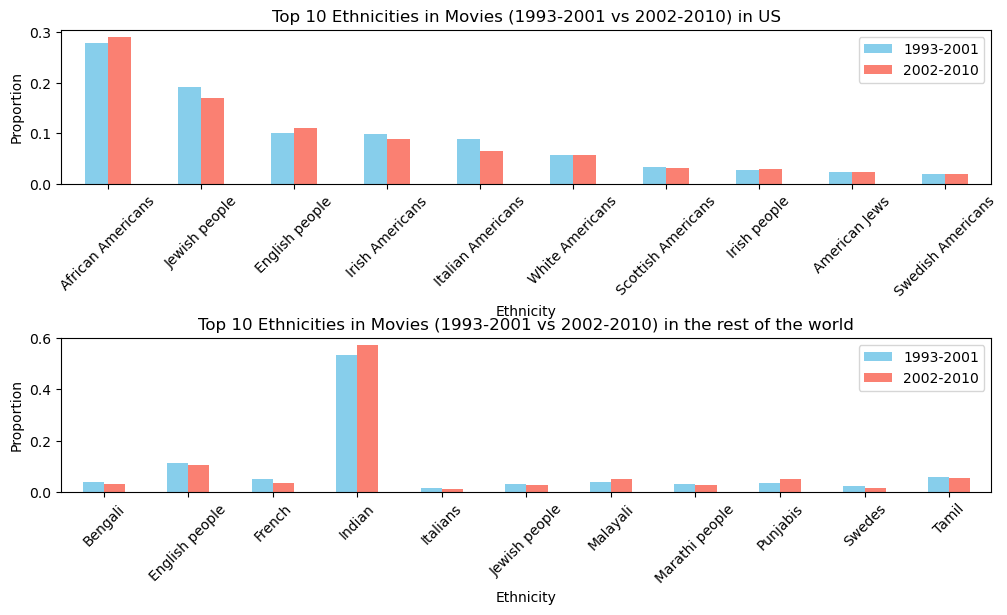

In [89]:
# Plotting the rest of the world and the US 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))  # Adjust figsize as needed

ethnicity_proportions_US.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], ax =ax1)
ax1.set_title("Top 10 Ethnicities in Movies (1993-2001 vs 2002-2010) in US")
ax1.set_xlabel("Ethnicity")
ax1.set_ylabel("Proportion")
ax1.tick_params(axis='x', rotation=45)

ethnicity_proportions_ROW.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], ax =ax2)
ax2.set_title("Top 10 Ethnicities in Movies (1993-2001 vs 2002-2010) in the rest of the world")
ax2.set_xlabel("Ethnicity")
ax2.set_ylabel("Proportion")
ax2.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=1)
plt.show()

We observe there is no major changes in the top 10 actor ethnciites representation in the movies between 1993 and 2010 neither in the rest of the world or the United States.

Finally, we want to isolate the actor ethnicities that exhibit major changes before and after 9/11. Therefore, we will look at the top 10  actor ethnicites that exxhibit larger relative changes ratio. 

In [91]:
# Count the occurrences of each ethnicity in each period for rest of the world and US 
ethnicity_counts_1993_2001_US = data_1993_2001_US['Actor_Ethnicity'].value_counts()
ethnicity_counts_2002_2010_US = data_2002_2010_US['Actor_Ethnicity'].value_counts()

ethnicity_counts_1993_2001_ROW = data_1993_2001_ROW['Actor_Ethnicity'].value_counts()
ethnicity_counts_2002_2010_ROW = data_2002_2010_ROW['Actor_Ethnicity'].value_counts()

# We compute the relative changes for each ethnicites between 1991 and 2011
#Use absolute value to avoid the negative value and for subsequnet isolation of smaller and largest relative difference 
ratio_US = np.abs(ethnicity_counts_1993_2001_US - ethnicity_counts_2002_2010_US) / (ethnicity_counts_1993_2001_US)
ratio_ROW = np.abs(ethnicity_counts_1993_2001_ROW - ethnicity_counts_2002_2010_ROW) / (ethnicity_counts_1993_2001_ROW)


# Sort by the ratio to find the largest 
largest_ratios_US = ratio_US.nlargest(10)
largest_ratios_ROW = ratio_ROW.nlargest(10)

ratio_new_US = []
ratio_new_ROW = []
for i in range(0, len(largest_ratios_US)):
    ratio_new_US.append(freebase2label(largest_ratios_US.index[i],freebase_mapping_df))
    ratio_new_ROW.append(freebase2label(largest_ratios_ROW.index[i],freebase_mapping_df))
largest_ratios_ROW.index = ratio_new_ROW
largest_ratios_US.index = ratio_new_US
# Print the ethnicities with the largest relative difference
print("US: 5 Largest Ratios:\n", largest_ratios_US)
print("Rest of the world: 5 Largest Ratios:\n", largest_ratios_ROW)




US: 5 Largest Ratios:
 Japanese people        14.50
Ukrainians             14.00
Eurasian               14.00
Gujarati people        12.00
None                   11.00
None                    9.00
Dominican Americans     8.25
Chinese Canadians       8.00
Croatian Canadians      8.00
Filipino people         8.00
Name: count, dtype: float64
Rest of the world: 5 Largest Ratios:
 None                    34.000000
Tulu people             29.000000
Chinese Filipino        16.400000
Filipino people         13.833333
None                    13.500000
Sikh                    13.000000
African people          11.000000
Filipino Australians     9.000000
None                     9.000000
Lao people               8.000000
Name: count, dtype: float64


We observe ratios larger than 1 meaning they exhibit significant differences between the 2 observed periods, i.e before and after 9/11. From this first analysis, we do not observe any tendency of impact of 9/11 on racism. 

Another thing to note is the absence of muslim ethnicity in our control dataset. We assume if 9/11 should have an impact on racism it might be on muslim ethnicity. Therefore, the absence of this ethnicity in our control dataset penalize our analysis. 